<a href="https://colab.research.google.com/github/CyberBantu/Analise-de-Cobertura-Vacinal/blob/main/Analise_Cobertura_Vacinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import basedosdados as bd
import matplotlib.pyplot as plt

#### Exportação de dados

In [21]:
df = bd.read_table(dataset_id='br_ieps_saude',
table_id='municipio',
billing_project_id="idebanalisebd")

Downloading: 100%|██████████| 66840/66840 [01:00<00:00, 1103.67rows/s]


In [192]:
df.to_csv('cobertura_vacinal.csv')

In [23]:
df.columns

Index(['ano', 'id_municipio', 'sigla_uf', 'nome', 'cob_ab', 'cob_acs',
       'cob_esf', 'cob_vac_bcg', 'cob_vac_rota', 'cob_vac_menin',
       'cob_vac_pneumo', 'cob_vac_polio', 'cob_vac_tvd1', 'cob_vac_penta',
       'cob_vac_hepb', 'cob_vac_hepa', 'pct_prenatal_adeq',
       'pct_prenatal_zero', 'pct_prenatal_1a6', 'pct_prenatal_7m',
       'tx_mort_inf_ibge', 'n_obitos', 'n_obitos_csap', 'n_obitos_evit',
       'n_obitos_maldef', 'tx_mort', 'tx_mort_csap', 'tx_mort_evit',
       'pct_mort_maldef', 'tx_mort_aj_oms', 'tx_mort_csap_aj_oms',
       'tx_mort_evit_aj_oms', 'tx_mort_aj_cens', 'tx_mort_csap_aj_cens',
       'tx_mort_evit_aj_cens', 'n_hosp', 'n_hosp_csap', 'tx_hosp',
       'tx_hosp_csap', 'n_leitouti_sus', 'n_leito_sus', 'tx_leito_sus',
       'tx_leitouti_sus', 'n_enf', 'n_med', 'n_enf_ch', 'n_med_ch', 'tx_med',
       'tx_enf', 'tx_med_ch', 'tx_enf_ch', 'n_leito_nsus', 'n_leitouti_nsus',
       'tx_leito_nsus', 'tx_leitouti_nsus', 'cob_priv',
       'pct_desp_recp_saude_

In [ ]:
df.info()

In [25]:
df.head()

,ano,id_municipio,sigla_uf,nome,cob_ab,cob_acs,cob_esf,cob_vac_bcg,cob_vac_rota,cob_vac_menin,...,desp_recp_saude_pc_mun,pct_desp_recp_saude_uf,desp_tot_saude_pc_uf,desp_recp_saude_pc_uf,desp_tot_saude_pc_mun_def,desp_recp_saude_pc_mun_def,desp_tot_saude_pc_uf_def,desp_recp_saude_pc_uf_def,num_familias_bf,gasto_pbf_pc_def
0,2010,1200013,AC,Acrelândia,100.0,100.0,100.0,42.962963,57.037037,1.111111,...,100.42,NaN,NaN,NaN,510.673460,192.304454,NaN,NaN,<NA>,191.956615
1,2010,1200054,AC,Assis Brasil,100.0,100.0,100.0,55.357143,37.500000,0.000000,...,210.32,NaN,NaN,NaN,941.893506,402.763123,NaN,NaN,<NA>,255.392586
2,2010,1200104,AC,Brasiléia,100.0,100.0,100.0,100.000000,88.322718,0.000000,...,104.82,NaN,NaN,NaN,397.420269,200.730461,NaN,NaN,<NA>,220.697901
3,2010,1200138,AC,Bujari,100.0,100.0,100.0,90.566038,100.000000,0.000000,...,130.27,NaN,NaN,NaN,447.497559,249.467250,NaN,NaN,<NA>,211.760211
4,2010,1200179,AC,Capixaba,100.0,100.0,100.0,49.746193,67.512690,0.000000,...,98.98,NaN,NaN,NaN,357.435037,189.546852,NaN,NaN,<NA>,216.774669


In [26]:
# Olhando os anos
df['ano'].unique()

<IntegerArray>
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Length: 12, dtype: Int64

### Dados 2021

In [28]:
## ohando para os dados de 2021
df_2021 = df[df['ano'] == 2021]
print(df_2021.shape[0])


5570


In [30]:
# Aparentemente nao tem nenhum dados faltante
df_2021.isna().count()

ano                           5570
id_municipio                  5570
sigla_uf                      5570
nome                          5570
cob_ab                        5570
                              ... 
desp_recp_saude_pc_mun_def    5570
desp_tot_saude_pc_uf_def      5570
desp_recp_saude_pc_uf_def     5570
num_familias_bf               5570
gasto_pbf_pc_def              5570
Length: 68, dtype: int64

In [32]:
# Olhando para a cobertura de hepatite A
print(df_2021['cob_vac_bcg'].max(), df_2021['cob_vac_bcg'].min())

100.0 0.0


* Observando a cobertura vacinal em 2021 para a BCG

In [41]:
cob_bcg_2021 = df_2021.groupby('sigla_uf')['cob_vac_bcg'].mean().reset_index().sort_values(by = 'cob_vac_bcg', ascending = False)
cob_bcg_2021.tail()

,sigla_uf,cob_vac_bcg
1,AL,56.953795
4,BA,53.126541
0,AC,52.440786
14,PB,40.453385
21,RR,22.476823


1. Plotando Grafico

In [104]:
# Separando os 10 primeiros e os ultimos
cob_bcg_2021_top_10 = cob_bcg_2021.head(10)
cob_bcg_2021_top_10
cob_bcg_2021_10b = cob_bcg_2021.tail(17) # Os outros 17 estados
cob_bcg_2021_10b

,sigla_uf,cob_vac_bcg
11,MS,67.261964
16,PI,67.090155
13,PA,66.505125
8,GO,66.382064
9,MA,65.863159
15,PE,65.822188
23,SC,65.353047
20,RO,65.033493
12,MT,64.518089
25,SP,64.442703


* Grafico dos 10 melhores coberturas

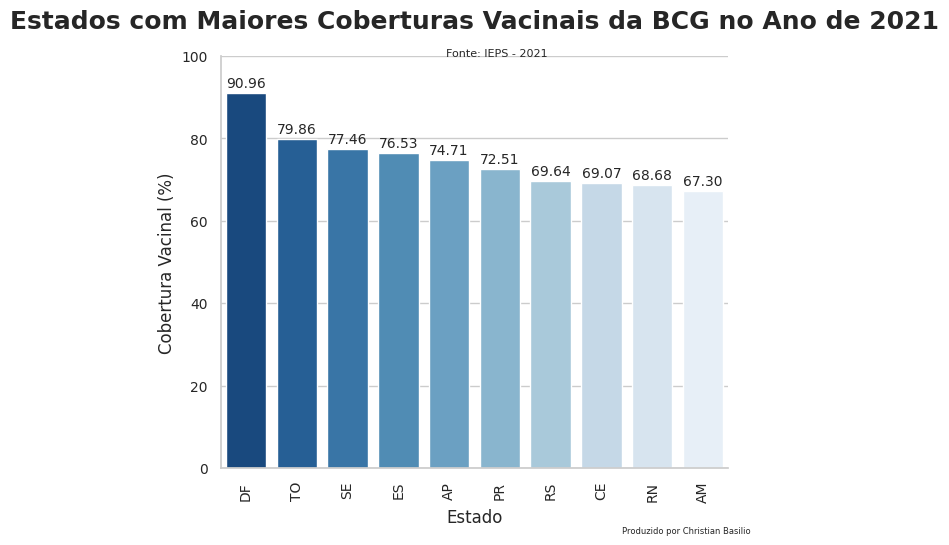

In [146]:
paleta_cores = sns.color_palette('Blues_r', n_colors=len(cob_bcg_2021_top_10))

grafico = sns.catplot(data=cob_bcg_2021_top_10, x='sigla_uf', y='cob_vac_bcg', kind='bar', height=5, aspect=1.2, palette=paleta_cores)
plt.xticks(rotation=90)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Cobertura Vacinal (%)', fontsize=12)
plt.title('Estados com Maiores Coberturas Vacinais da BCG no Ano de 2021', loc='center', fontdict={'fontsize': 18, 'fontweight': 'bold'}, pad=20)
plt.suptitle("Fonte: IEPS - 2021", size=8, ha='left')
plt.figtext(0.9, 0.01, "Produzido por Christian Basilio", ha="center", fontsize=6)
plt.ylim(0, 100)


for ax in grafico.axes.flat:
    ax.bar_label(ax.containers[0], label_type="edge", fontsize=10, padding=2, fmt='{0:.2f}')


plt.tick_params(axis='both', labelsize=10) # Ajuste dos rotulos


# Mostrar gráfico
plt.show()

* Gráfico das piores coberturas

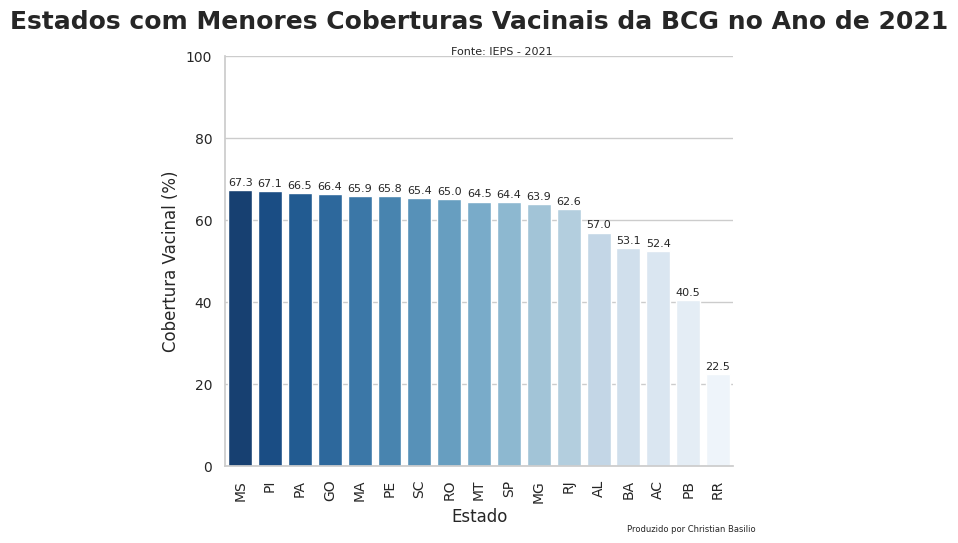

In [149]:
paleta_cores = sns.color_palette('Blues_r', n_colors=len(cob_bcg_2021_10b))

grafico = sns.catplot(data=cob_bcg_2021_10b, x='sigla_uf', y='cob_vac_bcg', kind='bar', height=5, aspect=1.2, palette=paleta_cores)
plt.xticks(rotation=90)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Cobertura Vacinal (%)', fontsize=12)
plt.title('Estados com Menores Coberturas Vacinais da BCG no Ano de 2021', loc='center', fontdict={'fontsize': 18, 'fontweight': 'bold'}, pad=20)
plt.suptitle("Fonte: IEPS - 2021", size=8, ha='left')
plt.figtext(0.9, 0.01, "Produzido por Christian Basilio", ha="center", fontsize=6)
plt.ylim(0, 100)

for ax in grafico.axes.flat:
    ax.bar_label(ax.containers[0], label_type="edge", fontsize=8, padding=2, fmt='{0:.1f}')


plt.tick_params(axis='both', labelsize=10) # Ajuste dos rotulos


# Mostrar gráfico
plt.show()

### Olhando para a cobertura de BCG nos Estados nos Ultimos anos

In [150]:
df.head()

,ano,id_municipio,sigla_uf,nome,cob_ab,cob_acs,cob_esf,cob_vac_bcg,cob_vac_rota,cob_vac_menin,...,desp_recp_saude_pc_mun,pct_desp_recp_saude_uf,desp_tot_saude_pc_uf,desp_recp_saude_pc_uf,desp_tot_saude_pc_mun_def,desp_recp_saude_pc_mun_def,desp_tot_saude_pc_uf_def,desp_recp_saude_pc_uf_def,num_familias_bf,gasto_pbf_pc_def
0,2010,1200013,AC,Acrelândia,100.0,100.0,100.0,42.962963,57.037037,1.111111,...,100.42,NaN,NaN,NaN,510.673460,192.304454,NaN,NaN,<NA>,191.956615
1,2010,1200054,AC,Assis Brasil,100.0,100.0,100.0,55.357143,37.500000,0.000000,...,210.32,NaN,NaN,NaN,941.893506,402.763123,NaN,NaN,<NA>,255.392586
2,2010,1200104,AC,Brasiléia,100.0,100.0,100.0,100.000000,88.322718,0.000000,...,104.82,NaN,NaN,NaN,397.420269,200.730461,NaN,NaN,<NA>,220.697901
3,2010,1200138,AC,Bujari,100.0,100.0,100.0,90.566038,100.000000,0.000000,...,130.27,NaN,NaN,NaN,447.497559,249.467250,NaN,NaN,<NA>,211.760211
4,2010,1200179,AC,Capixaba,100.0,100.0,100.0,49.746193,67.512690,0.000000,...,98.98,NaN,NaN,NaN,357.435037,189.546852,NaN,NaN,<NA>,216.774669


In [153]:
# AGrupando
base_ano = df.groupby(['ano', 'sigla_uf'])['cob_vac_bcg'].mean().reset_index().rename(columns = {'cob_vac_bcg' : 'porcent'})
base_ano.head()

,ano,sigla_uf,porcent
0,2010,AC,84.788356
1,2010,AL,92.021297
2,2010,AM,94.818071
3,2010,AP,87.537631
4,2010,BA,83.141159


###### Analisando Sudeste

In [166]:
# Analisando o rio
base_ano_sudeste = base_ano.query("sigla_uf in ['RJ', 'SP', 'ES','MG']")
base_ano_sudeste.head()

,ano,sigla_uf,porcent
7,2010,ES,82.254929
10,2010,MG,73.600826
18,2010,RJ,94.752016
25,2010,SP,78.083919
34,2011,ES,83.212593


* Gráfico

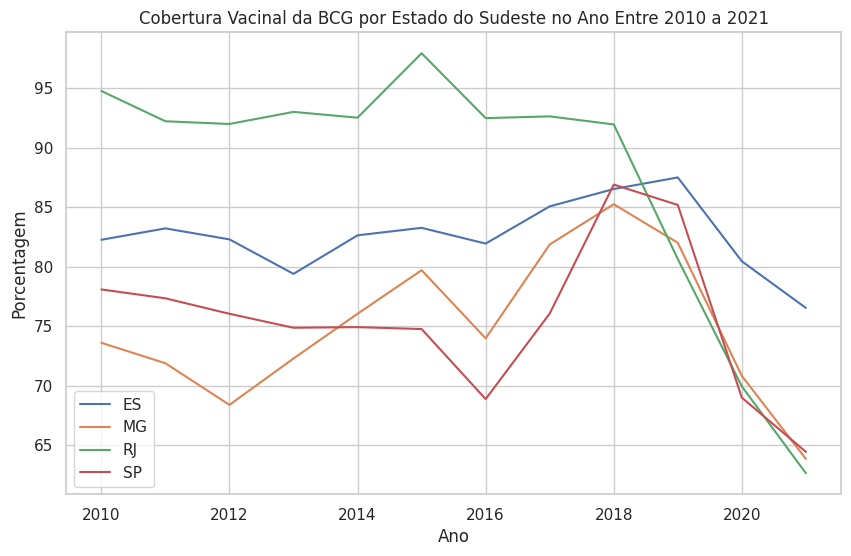

In [178]:
fig, ax = plt.subplots(figsize=(10, 6))

for uf in base_ano_sudeste['sigla_uf'].unique():
    data = base_ano_sudeste[base_ano['sigla_uf'] == uf]
    ax.plot(data['ano'], data['porcent'], label=uf)

ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem')
ax.set_title('Cobertura Vacinal da BCG por Estado do Sudeste no Ano Entre 2010 a 2021')
ax.legend(loc='lower left')
plt.show()

* Apartir desse diagnostico decidi que queria analisar as variaveis por Região, para analisar o Padrão Gerado

In [169]:
import geobr

In [171]:
br = geobr.read_state()
br.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."


In [175]:
# Mudando nome da colunas
br = br.rename(columns = {'abbrev_state': 'sigla_uf'})
br.head(2)

,code_state,sigla_uf,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."


In [176]:
# Juntando os dados
base_ano = base_ano.merge(br, how = 'left', on = 'sigla_uf')
base_ano.head()

,ano,sigla_uf,porcent,code_state,name_state,code_region,name_region,geometry
0,2010,AC,84.788356,12.0,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
1,2010,AL,92.021297,27.0,Alagoas,2.0,Nordeste,"MULTIPOLYGON (((-35.46753 -8.81744, -35.46430 ..."
2,2010,AM,94.818071,13.0,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,2010,AP,87.537631,16.0,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
4,2010,BA,83.141159,29.0,Bahia,2.0,Nordeste,"MULTIPOLYGON (((-39.36446 -8.53785, -39.35681 ..."


##### Analisando a região norte

In [177]:
norte = base_ano.query("name_region == 'Norte'")
norte.head()

,ano,sigla_uf,porcent,code_state,name_state,code_region,name_region,geometry
0,2010,AC,84.788356,12.0,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,2010,AM,94.818071,13.0,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,2010,AP,87.537631,16.0,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
13,2010,PA,93.261334,15.0,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."
20,2010,RO,81.612272,11.0,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."


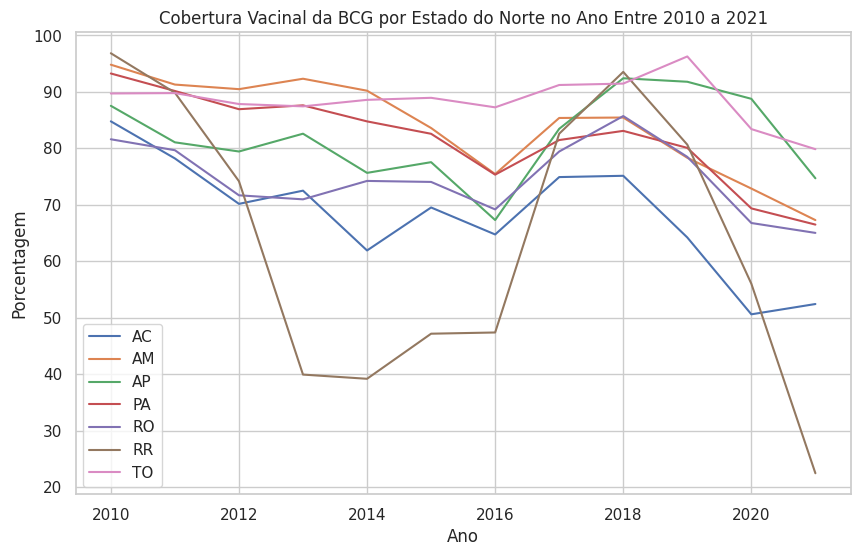

In [180]:
fig, ax = plt.subplots(figsize=(10, 6))

for uf in norte['sigla_uf'].unique():
    data = norte[norte['sigla_uf'] == uf]
    ax.plot(data['ano'], data['porcent'], label=uf)

ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem')
ax.set_title('Cobertura Vacinal da BCG por Estado do Norte no Ano Entre 2010 a 2021')
ax.legend(loc='lower left')
plt.show()

##### Analise da Região Sul

In [181]:
sul = base_ano.query("name_region == 'Sul'")
sul.head()

,ano,sigla_uf,porcent,code_state,name_state,code_region,name_region,geometry
17,2010,PR,92.364548,41.0,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.05188 -22.53933, -52.03446..."
22,2010,RS,84.409709,43.0,Rio Grande Do Sul,4.0,Sul,"MULTIPOLYGON (((-51.90486 -27.45935, -51.90129..."
23,2010,SC,79.817197,42.0,Santa Catarina,4.0,Sul,"MULTIPOLYGON (((-48.63865 -25.96873, -48.63434..."
44,2011,PR,92.530256,41.0,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.05188 -22.53933, -52.03446..."
49,2011,RS,84.529606,43.0,Rio Grande Do Sul,4.0,Sul,"MULTIPOLYGON (((-51.90486 -27.45935, -51.90129..."


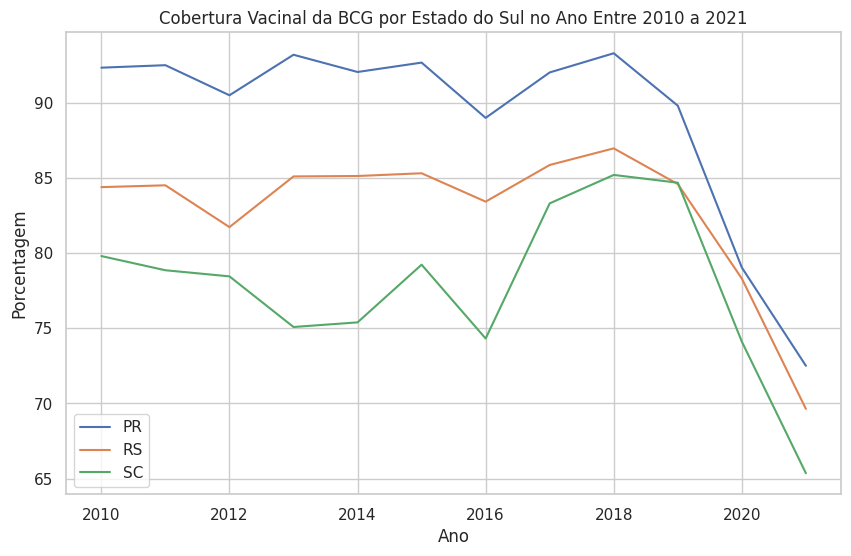

In [182]:
fig, ax = plt.subplots(figsize=(10, 6))

for uf in sul['sigla_uf'].unique():
    data = sul[sul['sigla_uf'] == uf]
    ax.plot(data['ano'], data['porcent'], label=uf)

ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem')
ax.set_title('Cobertura Vacinal da BCG por Estado do Sul no Ano Entre 2010 a 2021')
ax.legend(loc='lower left')
plt.show()

##### Analisando a Região Nordeste

In [184]:
nordeste = base_ano.query("name_region == 'Nordeste'")
nordeste.head()

,ano,sigla_uf,porcent,code_state,name_state,code_region,name_region,geometry
1,2010,AL,92.021297,27.0,Alagoas,2.0,Nordeste,"MULTIPOLYGON (((-35.46753 -8.81744, -35.46430 ..."
4,2010,BA,83.141159,29.0,Bahia,2.0,Nordeste,"MULTIPOLYGON (((-39.36446 -8.53785, -39.35681 ..."
5,2010,CE,92.876151,23.0,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ..."
9,2010,MA,85.900261,21.0,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ..."
14,2010,PB,49.437892,25.0,Paraíba,2.0,Nordeste,"MULTIPOLYGON (((-37.22269 -6.04215, -37.21642 ..."


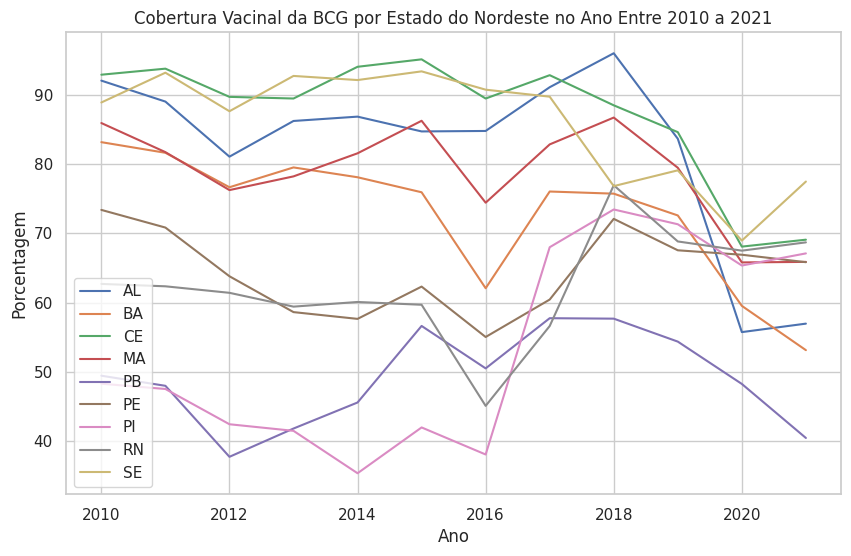

In [186]:
fig, ax = plt.subplots(figsize=(10, 6))

for uf in nordeste['sigla_uf'].unique():
    data = nordeste[nordeste['sigla_uf'] == uf]
    ax.plot(data['ano'], data['porcent'], label=uf)

ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem')
ax.set_title('Cobertura Vacinal da BCG por Estado do Nordeste no Ano Entre 2010 a 2021')
ax.legend(loc='lower left')
plt.show()

##### Regiao Centro Oeste

In [190]:
co = base_ano.query("name_region == 'Centro Oeste'")
co.head()

,ano,sigla_uf,porcent,code_state,name_state,code_region,name_region,geometry
6,2010,DF,100.000000,53.0,Distrito Federal,5.0,Centro Oeste,"MULTIPOLYGON (((-47.57461 -15.51341, -47.56997..."
8,2010,GO,91.210438,52.0,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-50.16015 -12.42007, -50.15856..."
11,2010,MS,86.537762,50.0,Mato Grosso Do Sul,5.0,Centro Oeste,"MULTIPOLYGON (((-56.10370 -17.17354, -56.09692..."
12,2010,MT,89.748772,51.0,Mato Grosso,5.0,Centro Oeste,"MULTIPOLYGON (((-54.89485 -17.62150, -54.89704..."
33,2011,DF,98.386069,53.0,Distrito Federal,5.0,Centro Oeste,"MULTIPOLYGON (((-47.57461 -15.51341, -47.56997..."


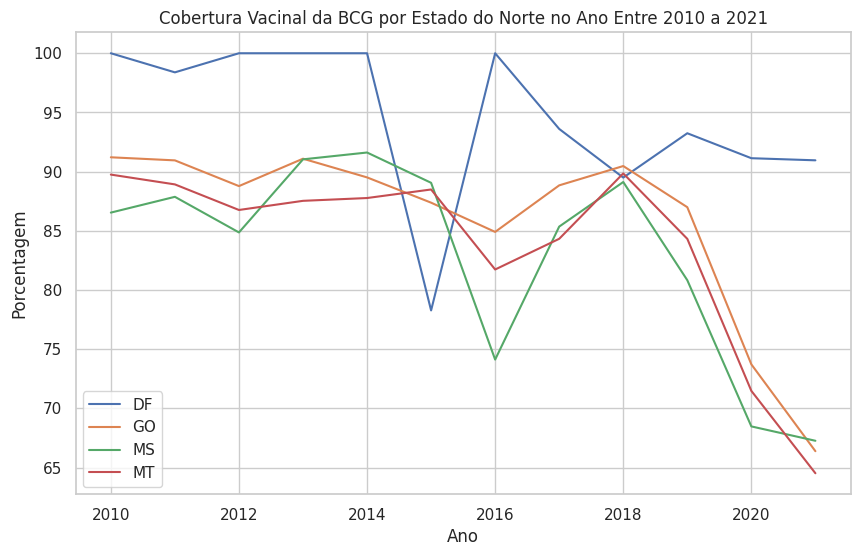

In [191]:
fig, ax = plt.subplots(figsize=(10, 6))

for uf in co['sigla_uf'].unique():
    data = co[co['sigla_uf'] == uf]
    ax.plot(data['ano'], data['porcent'], label=uf)

ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem')
ax.set_title('Cobertura Vacinal da BCG por Estado do Norte no Ano Entre 2010 a 2021')
ax.legend(loc='lower left')
plt.show()

### Analisando  as Diferenças Percenturais

In [193]:
base_ano.head()

,ano,sigla_uf,porcent,code_state,name_state,code_region,name_region,geometry
0,2010,AC,84.788356,12.0,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
1,2010,AL,92.021297,27.0,Alagoas,2.0,Nordeste,"MULTIPOLYGON (((-35.46753 -8.81744, -35.46430 ..."
2,2010,AM,94.818071,13.0,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,2010,AP,87.537631,16.0,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
4,2010,BA,83.141159,29.0,Bahia,2.0,Nordeste,"MULTIPOLYGON (((-39.36446 -8.53785, -39.35681 ..."


In [195]:
# Agrupando por porcentagem novamente
agrup_estado = base_ano.groupby(['sigla_uf', 'ano', 'name_region'])['porcent'].mean().reset_index()
agrup_estado.head()

,sigla_uf,ano,name_region,porcent
0,AC,2010,Norte,84.788356
1,AC,2011,Norte,78.219749
2,AC,2012,Norte,70.175534
3,AC,2013,Norte,72.514468
4,AC,2014,Norte,61.924185


In [236]:

# Criei um diciionario fazendo um comparativo entre os anos para cda um dos estados e depois juntei dentro de um dataframe
diff_porcent = {}
for sigla_uf, group in agrup_estado.groupby('sigla_uf'):
    group = group.sort_values('ano')
    diff = []
    for i in range(len(group)-1):
        porcent_atual = group.iloc[i]['porcent']
        porcent_prox = group.iloc[i+1]['porcent']
        diff.append(porcent_prox - porcent_atual)
    diff_porcent[sigla_uf] = diff

df_diff = pd.DataFrame.from_dict(diff_porcent, orient='index', columns=['diff_2010_2011', 'diff_2011_2012', 'diff_2012_2013', 'diff_2013_2014', 'diff_2014_2015', 'diff_2015_2016', 'diff_2016_2017', 'diff_2017_2018', 'diff_2018_2019', 'diff_2019_2020', 'diff_2020_2021'])



In [237]:
df_diff

,diff_2010_2011,diff_2011_2012,diff_2012_2013,diff_2013_2014,diff_2014_2015,diff_2015_2016,diff_2016_2017,diff_2017_2018,diff_2018_2019,diff_2019_2020,diff_2020_2021
AC,-6.568607,-8.044215,2.338934,-10.590283,7.609655,-4.776640,10.160916,0.227992,-10.919550,-13.607662,1.821889
AL,-3.024743,-7.947348,5.150696,0.625085,-2.134326,0.067421,6.312945,4.901428,-12.339094,-27.901928,1.222363
AM,-3.519052,-0.813401,1.846609,-2.119809,-6.606314,-8.161317,9.941152,0.075789,-7.127404,-5.449050,-5.584979
AP,-6.466198,-1.623419,3.151857,-6.936126,1.894693,-10.247882,16.155414,8.949837,-0.618825,-3.021334,-14.070498
BA,-1.533864,-4.972398,2.860717,-1.418459,-2.166693,-13.849013,13.958328,-0.310067,-3.144411,-13.048093,-6.390666
CE,0.871928,-4.069570,-0.238477,4.578688,1.074769,-5.654592,3.368807,-4.348740,-3.871629,-16.519398,1.000341
DF,-1.613931,1.613931,0.000000,0.000000,-21.725943,21.725943,-6.393604,-4.110239,3.745631,-2.109137,-0.177486
ES,0.957664,-0.923291,-2.897157,3.237559,0.628328,-1.322301,3.124922,1.457867,0.973221,-7.041561,-3.921553
GO,-0.260435,-2.172612,2.313646,-1.578989,-2.135049,-2.470255,3.932624,1.631997,-3.477325,-13.275917,-7.336059
MA,-4.197617,-5.476822,1.977025,3.331622,4.691415,-11.818164,8.410014,3.872958,-7.241000,-13.661767,0.075235


In [238]:
df_diff_reset = df_diff.reset_index().rename(columns = {'index' : 'Estado'})

In [239]:
df_diff_reset

,Estado,diff_2010_2011,diff_2011_2012,diff_2012_2013,diff_2013_2014,diff_2014_2015,diff_2015_2016,diff_2016_2017,diff_2017_2018,diff_2018_2019,diff_2019_2020,diff_2020_2021
0,AC,-6.568607,-8.044215,2.338934,-10.590283,7.609655,-4.776640,10.160916,0.227992,-10.919550,-13.607662,1.821889
1,AL,-3.024743,-7.947348,5.150696,0.625085,-2.134326,0.067421,6.312945,4.901428,-12.339094,-27.901928,1.222363
2,AM,-3.519052,-0.813401,1.846609,-2.119809,-6.606314,-8.161317,9.941152,0.075789,-7.127404,-5.449050,-5.584979
3,AP,-6.466198,-1.623419,3.151857,-6.936126,1.894693,-10.247882,16.155414,8.949837,-0.618825,-3.021334,-14.070498
4,BA,-1.533864,-4.972398,2.860717,-1.418459,-2.166693,-13.849013,13.958328,-0.310067,-3.144411,-13.048093,-6.390666
5,CE,0.871928,-4.069570,-0.238477,4.578688,1.074769,-5.654592,3.368807,-4.348740,-3.871629,-16.519398,1.000341
6,DF,-1.613931,1.613931,0.000000,0.000000,-21.725943,21.725943,-6.393604,-4.110239,3.745631,-2.109137,-0.177486
7,ES,0.957664,-0.923291,-2.897157,3.237559,0.628328,-1.322301,3.124922,1.457867,0.973221,-7.041561,-3.921553
8,GO,-0.260435,-2.172612,2.313646,-1.578989,-2.135049,-2.470255,3.932624,1.631997,-3.477325,-13.275917,-7.336059
9,MA,-4.197617,-5.476822,1.977025,3.331622,4.691415,-11.818164,8.410014,3.872958,-7.241000,-13.661767,0.075235


In [240]:
df_diff_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Estado          27 non-null     object 
 1   diff_2010_2011  27 non-null     float64
 2   diff_2011_2012  27 non-null     float64
 3   diff_2012_2013  27 non-null     float64
 4   diff_2013_2014  27 non-null     float64
 5   diff_2014_2015  27 non-null     float64
 6   diff_2015_2016  27 non-null     float64
 7   diff_2016_2017  27 non-null     float64
 8   diff_2017_2018  27 non-null     float64
 9   diff_2018_2019  27 non-null     float64
 10  diff_2019_2020  27 non-null     float64
 11  diff_2020_2021  27 non-null     float64
dtypes: float64(11), object(1)
memory usage: 2.7+ KB


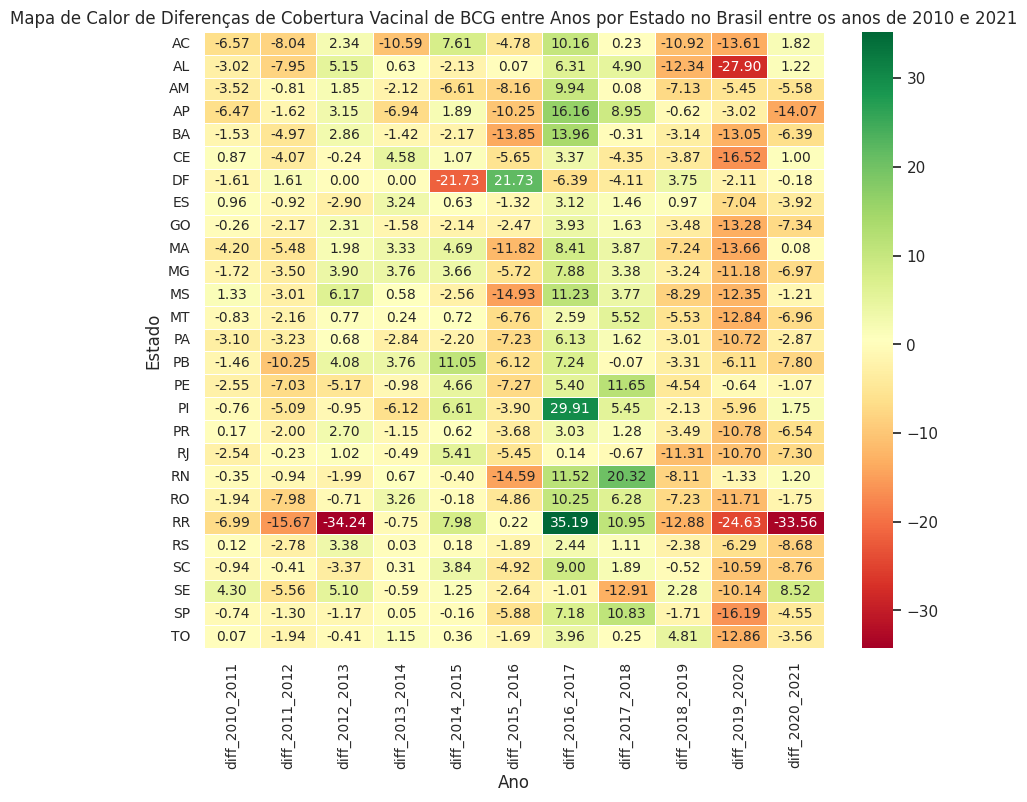

In [241]:
# Plotando o mapa de calor
plt.figure(figsize=(10, 8))
grafico_calor = sns.heatmap(df_diff, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=.5)
grafico_calor.set_title("Mapa de Calor de Diferenças de Cobertura Vacinal de BCG por Estado entre os anos de 2010 e 2021")

grafico_calor.set_xlabel("Ano")
grafico_calor.set_ylabel("Estado")
grafico_calor.tick_params(axis='both', which='major', labelsize=10)

for text in grafico_calor.texts:
    text.set_size(10)
    text.set_ha('center')

plt.show()


* No ano de 2020 para 2021 75 % dos estados tinham diferenças negativas relativas ao ano anterior

<Axes: xlabel='diff_2020_2021'>

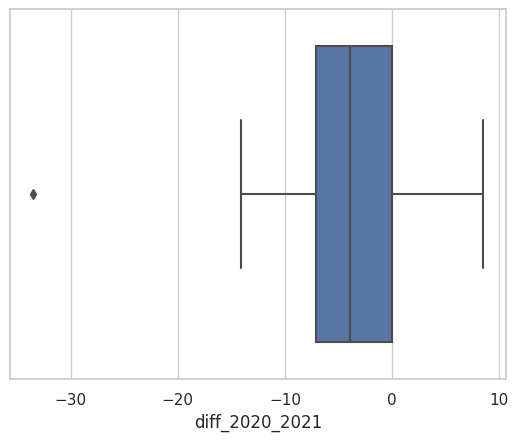

In [246]:
sns.boxplot(data = df_diff, x = 'diff_2020_2021')

## Analise % de Mortes